<a href="https://colab.research.google.com/github/Byeon-MJ/DL_Practice_Repo/blob/main/AutoEncoder_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AutoEncoder 실습하기

In [20]:
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape

import numpy as np
import matplotlib.pyplot as plt

## 데이터셋 로드

In [21]:
# MNIST Dataset Load
(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

## 생성자 모델 만들기

In [22]:
autoencoder = Sequential()

# 인코더
autoencoder.add(Conv2D(16, kernel_size=3, padding='same', input_shape=(28, 28, 1), activation='relu'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, activation='relu', padding='same'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, strides=2, padding='same', activation='relu'))

# 디코더
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(16, kernel_size=3, activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(1, kernel_size=3, padding='same', activation='sigmoid'))

autoencoder.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_27 (Conv2D)          (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_28 (Conv2D)          (None, 4, 4, 8)           584       
                                                                 
 conv2d_29 (Conv2D)          (None, 4, 4, 8)          

## 컴파일 및 학습

In [23]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(X_train, X_train, epochs=50, batch_size=128, validation_data=(X_test, X_test))

Epoch 1/50
469/469 [==============================] - 6s 8ms/step - loss: 0.2040 - val_loss: 0.1356
Epoch 2/50
469/469 [==============================] - 6s 13ms/step - loss: 0.1258 - val_loss: 0.1168
Epoch 3/50
469/469 [==============================] - 4s 9ms/step - loss: 0.1135 - val_loss: 0.1082
Epoch 4/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1070 - val_loss: 0.1036
Epoch 5/50
469/469 [==============================] - 4s 8ms/step - loss: 0.1030 - val_loss: 0.1004
Epoch 6/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1002 - val_loss: 0.0977
Epoch 7/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0982 - val_loss: 0.0960
Epoch 8/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0965 - val_loss: 0.0944
Epoch 9/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0952 - val_loss: 0.0942
Epoch 10/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0939 - val_loss: 0.092

In [24]:
# 학습된 결과 출력
random_test = np.random.randint(X_test.shape[0], size=5)

In [25]:
# 테스트할 이미지 랜덤 호출
ae_imgs = autoencoder.predict(X_test)

313/313 [==============================] - 1s 3ms/step


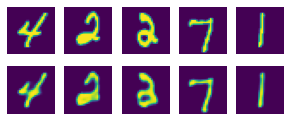

In [26]:
plt.figure(figsize=(7, 2))

for i, image_idx in enumerate(random_test):
    ax = plt.subplot(2, 7, i+1)
    # 테스트할 이미지 출력
    plt.imshow(X_test[image_idx].reshape(28, 28))
    ax.axis('off')
    ax = plt.subplot(2, 7, 7+i+1)
    # 오토인토딩 결과를 다음 열에 입력
    plt.imshow(ae_imgs[image_idx].reshape(28, 28))
    ax.axis('off')
plt.show()